Epoch 1/250 - Train Loss: 0.0971
Epoch 1 - Eval Metric (Train Loss): 0.0971
Epoch 2/250 - Train Loss: 0.0568
Epoch 2 - Eval Metric (Train Loss): 0.0568
Epoch 3/250 - Train Loss: 0.0520
Epoch 3 - Eval Metric (Train Loss): 0.0520
Epoch 4/250 - Train Loss: 0.0502
Epoch 4 - Eval Metric (Train Loss): 0.0502
Epoch 5/250 - Train Loss: 0.0478
Epoch 5 - Eval Metric (Train Loss): 0.0478
Epoch 6/250 - Train Loss: 0.0455
Epoch 6 - Eval Metric (Train Loss): 0.0455
Epoch 7/250 - Train Loss: 0.0436
Epoch 7 - Eval Metric (Train Loss): 0.0436
Epoch 8/250 - Train Loss: 0.0410
Epoch 8 - Eval Metric (Train Loss): 0.0410
Epoch 9/250 - Train Loss: 0.0388
Epoch 9 - Eval Metric (Train Loss): 0.0388
Epoch 10/250 - Train Loss: 0.0376
Epoch 10 - Eval Metric (Train Loss): 0.0376
Epoch 11/250 - Train Loss: 0.0369
Epoch 11 - Eval Metric (Train Loss): 0.0369
Epoch 12/250 - Train Loss: 0.0362
Epoch 12 - Eval Metric (Train Loss): 0.0362
Epoch 13/250 - Train Loss: 0.0354
Epoch 13 - Eval Metric (Train Loss): 0.0354
Epoc

Epoch 250/250 - Train Loss: 0.0211
Epoch 250 - Eval Metric (Train Loss): 0.0211
Saving best state with metric: 0.0211
Checkpoint saved at step 250 in directory '/Users/uribagi/Documents/GitHub/Latent-IQP/weights/binary_vae_250epoch_3e-5lr/checkpoint_250'
Checkpoint saved at the end of training: /Users/uribagi/Documents/GitHub/Latent-IQP/weights/binary_vae_250epoch_3e-5lr/checkpoint_250


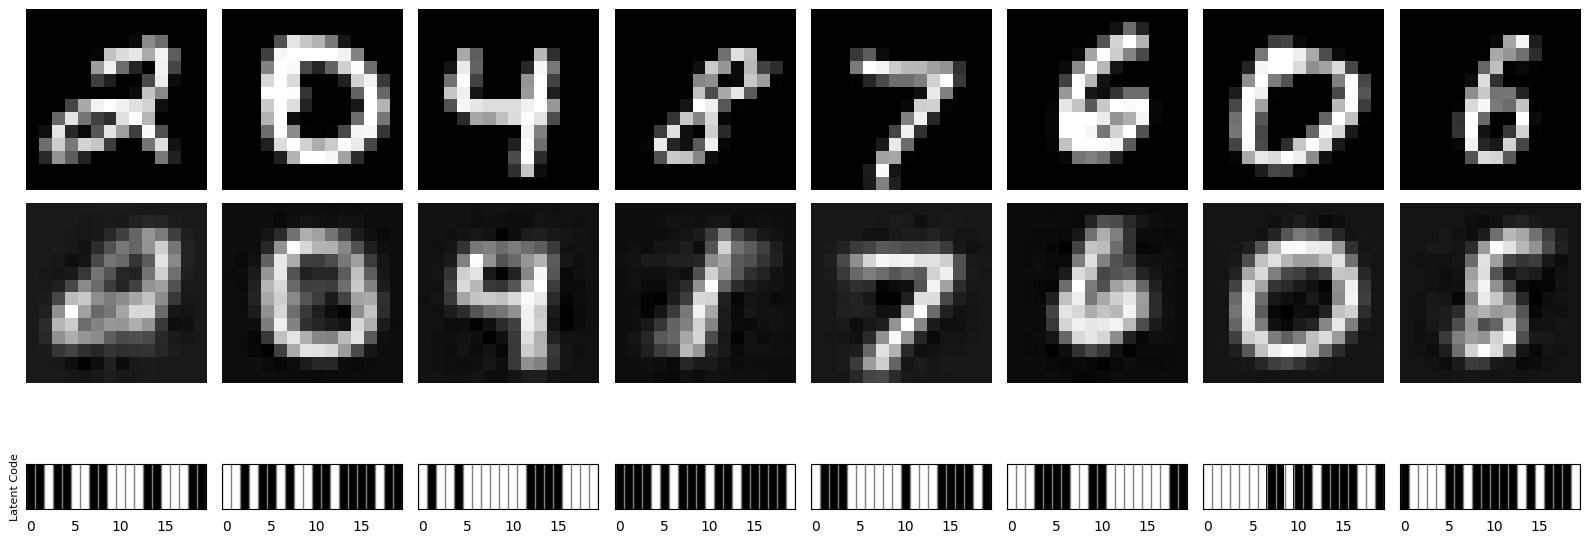

2025-04-08 10:51:24.334950: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [1]:
from jax import random
from datasets.mnist import MNISTDataset
from src.autoencoders.simple_vae import model
from src.utils.autoencoder_trainer import AutoencoderTrainer

batch_size = 128
latent_dim = 20
rng = random.PRNGKey(0)
binary_vae = model(latents=latent_dim)
input_shape = (batch_size, 196)
learning_rate = 3e-5

train_dataset = MNISTDataset(split='train', batch_size=batch_size, image_size=(14, 14)).load()
test_dataset = MNISTDataset(split='test', batch_size=batch_size, image_size=(14, 14)).load()

trainer = AutoencoderTrainer(binary_vae, learning_rate, rng, input_shape)

trainer.train(train_dataset, batch_size=batch_size, num_epochs=250, run_dir="weights/binary_vae_250epoch_3e-5lr")

trainer.plot_reconstructions(test_dataset, num_images=8)